In [2579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2580]:
## Common ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2581]:
### Just loading data
data = pd.read_csv('breastcancerdata.csv')

In [2582]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [2583]:
# I am just getting the first 5 
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2584]:
## Here i am just getting the last 5
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [2585]:
## getting more info on data
print(data.describe)

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

In [2586]:
data.info

<bound method DataFrame.info of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean con

In [2587]:
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [2588]:
### This is just spread of target variabla
print(data['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


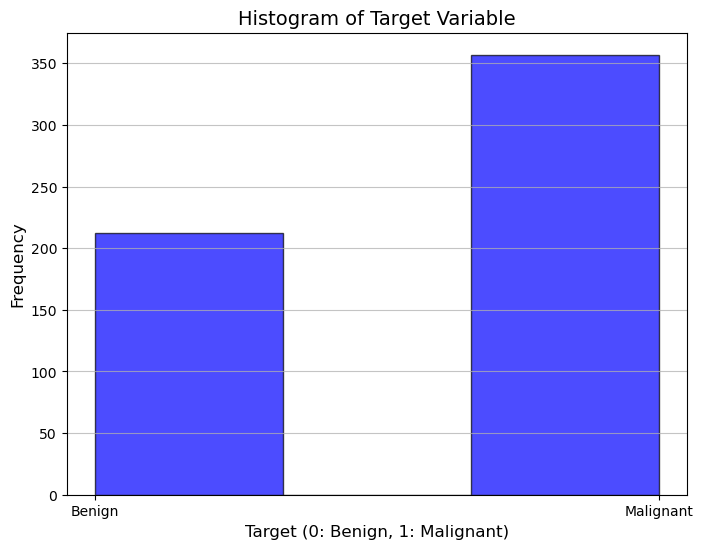

In [2589]:
# Trying to see the slit between the classes of the target variable
plt.figure(figsize=(8, 6))
plt.hist(data['target'], bins=3, color='blue', edgecolor='black', alpha=0.7)
plt.title("Histogram of Target Variable", fontsize=14)
plt.xlabel("Target (0: Benign, 1: Malignant)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks([0, 1], labels=["Benign", "Malignant"])
plt.grid(axis='y', alpha=0.75)
plt.show()

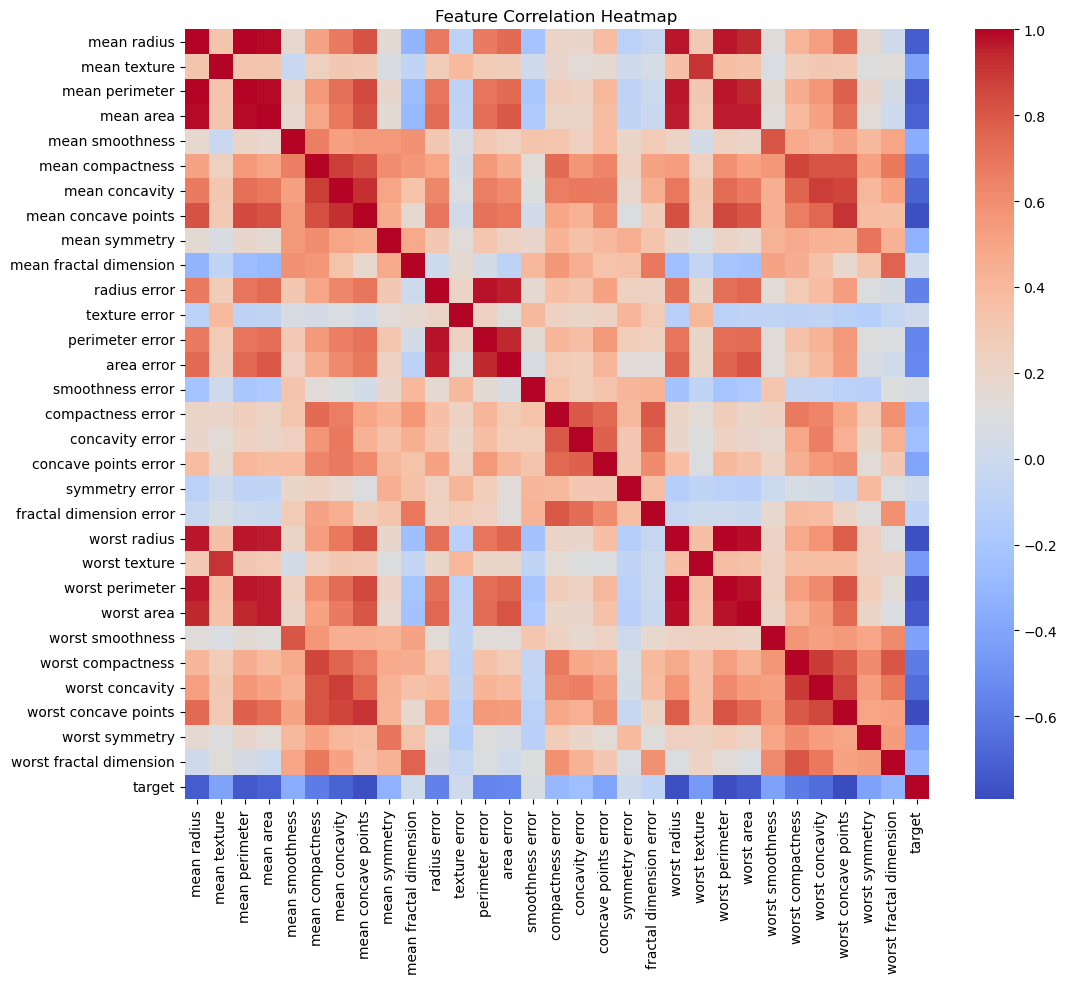

In [2590]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [2591]:
# Getting y to be the target variable
X = data.drop(columns=["target"])
y = data["target"]

In [2592]:
# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [2593]:
# Split into 80 train, 20 test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [2594]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((455, 30), (114, 30), (455,), (114,))

In [2595]:
# QP solver
from cvxopt import matrix, solvers

In [2596]:
def custom_svm(X_train, y_train):
    # +1, -1 for SVM
    y_train = y_train.replace(0, -1).values.astype(float)   
    # P is quadratic and q is linear
    m, n = X_train.shape
    K = np.dot(X_train, X_train.T)
    P = matrix(np.outer(y_train, y_train) * K)
    q = matrix(-np.ones(m))
    G = matrix(np.vstack((-np.eye(m), np.eye(m))))
    h = matrix(np.hstack((np.zeros(m), np.ones(m) * 1e4)))  # C is large for hard margin. I am thinkning about it as a real world applied project, with less flexibility
    A = matrix(y_train, (1, m), 'd')
    b = matrix(0.0)
    # QP solver
    solvers.options['show_progress'] = False
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])
    support_vector_indices = alphas > 1e-5
    support_vectors = X_train[support_vector_indices]
    support_vector_labels = y_train[support_vector_indices]
    support_alphas = alphas[support_vector_indices]
    # Weight vector and bias
    w = np.sum(support_alphas[:, None] * support_vector_labels[:, None] * support_vectors, axis=0)
    b = np.mean(support_vector_labels - np.dot(support_vectors, w))

    return w, b, support_vectors

In [2597]:
# Training custom SVM
w, b, support_vectors = custom_svm(pd.DataFrame(X_train), pd.Series(y_train))

In [2598]:
# Results
w, b, len(support_vectors)

(0      2.601003
 1     -3.217803
 2      4.411375
 3     -3.350697
 4      1.670347
 5     21.107782
 6    -11.699902
 7    -16.564282
 8      2.935881
 9     -8.570366
 10   -19.884311
 11     0.654575
 12     7.441191
 13     3.128592
 14    -1.228726
 15    -4.964358
 16     9.637969
 17    -4.714972
 18     5.703474
 19     5.713213
 20   -11.465403
 21    -2.295737
 22     9.339021
 23    -8.083095
 24     1.543554
 25    -3.308328
 26    -6.894040
 27    -3.417345
 28    -9.611719
 29     4.647072
 dtype: float64,
 -3.1100367160231763,
 25)

In [2599]:
def predict_custom_svm(X, w, b):
    decision = np.dot(X, w) + b
    predictions = np.where(decision >= 0, 1, 0)
    return predictions

In [2600]:
# Predictions for custom SVM model
y_pred_custom = predict_custom_svm(X_test, w, b)

In [2601]:
# Just metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2602]:
custom_accuracy = accuracy_score(y_test, y_pred_custom)
custom_precision = precision_score(y_test, y_pred_custom)
custom_recall = recall_score(y_test, y_pred_custom)
custom_f1 = f1_score(y_test, y_pred_custom)

In [2603]:
(custom_accuracy, custom_precision, custom_recall, custom_f1)

(0.9385964912280702, 0.9848484848484849, 0.9154929577464789, 0.948905109489051)

### Metrics are pretty good

In [2605]:
from sklearn.metrics import confusion_matrix

In [2606]:
# Custom SVM confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_custom)

In [2607]:
print(conf_matrix)

[[42  1]
 [ 6 65]]


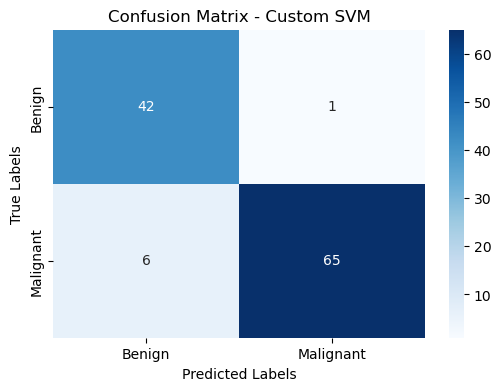

In [2608]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix - Custom SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [2609]:
from sklearn.metrics import roc_curve, auc

In [2610]:
# Decision function probabilities
decision_scores_custom = np.dot(X_test, w) + b

In [2611]:
# ROC curve and AUC for the custom SVM
fpr_custom, tpr_custom, _ = roc_curve(y_test, decision_scores_custom)
roc_auc_custom = auc(fpr_custom, tpr_custom)

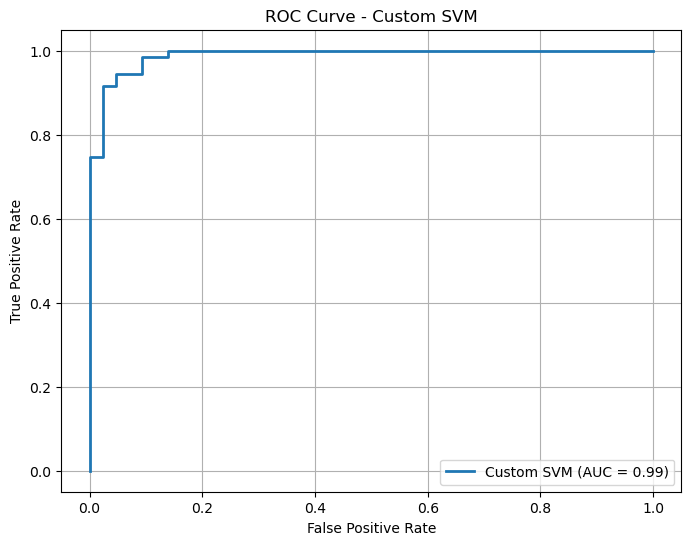

In [2612]:
# Just plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_custom, tpr_custom, label=f"Custom SVM (AUC = {roc_auc_custom:.2f})", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Custom SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [2613]:
roc_auc_custom

0.9888634130363576

In [2614]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [2615]:
precision_custom, recall_custom, _ = precision_recall_curve(y_test, decision_scores_custom)
avg_precision_custom = average_precision_score(y_test, decision_scores_custom)

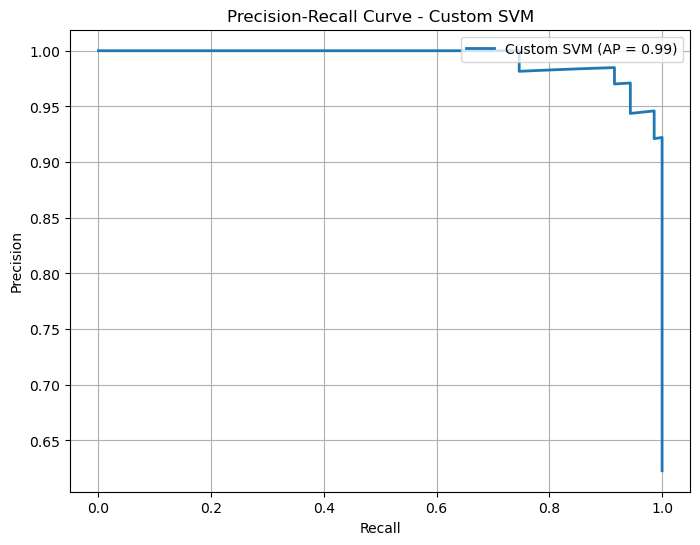

In [2616]:
# Precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_custom, precision_custom, label=f"Custom SVM (AP = {avg_precision_custom:.2f})", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Custom SVM")
plt.legend(loc="upper right")
plt.grid()
plt.show()

In [2617]:
avg_precision_custom

0.9929616884432462

### Library SVM

In [2619]:
from sklearn.svm import SVC
import time

In [2620]:
start_time = time.time()

In [2621]:
# Library SVM with a linear kernel
svc_model = SVC(kernel="linear", probability=True, random_state=42)

In [2622]:
svc_model.fit(X_train, y_train)
training_time_svc = time.time() - start_time

In [2623]:
# Library test
start_time = time.time()
y_pred_svc = svc_model.predict(X_test)
testing_time_svc = time.time() - start_time

In [2624]:
# Decision scores
decision_scores_svc = svc_model.decision_function(X_test)

In [2625]:
# Metrics
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_precision = precision_score(y_test, y_pred_svc)
svc_recall = recall_score(y_test, y_pred_svc)
svc_f1 = f1_score(y_test, y_pred_svc)

In [2626]:
fpr_svc, tpr_svc, _ = roc_curve(y_test, decision_scores_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

In [2627]:
precision_svc, recall_svc, _ = precision_recall_curve(y_test, decision_scores_svc)
avg_precision_svc = average_precision_score(y_test, decision_scores_svc)

In [2628]:
comparison_results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC", "Avg Precision", "Training Time (s)", "Testing Time (s)"],
    "Custom SVM": [custom_accuracy, custom_precision, custom_recall, custom_f1, roc_auc_custom, avg_precision_custom, None, None],
    "Library SVM": [svc_accuracy, svc_precision, svc_recall, svc_f1, roc_auc_svc, avg_precision_svc, training_time_svc, testing_time_svc],
}

In [2629]:
comparison_df = pd.DataFrame(comparison_results)

In [2630]:
comparison_df

,Metric,Custom SVM,Library SVM
0,Accuracy,0.938596,0.956140
1,Precision,0.984848,0.971429
2,Recall,0.915493,0.957746
3,F1-Score,0.948905,0.964539
4,ROC AUC,0.988863,0.996397
5,Avg Precision,0.992962,0.997806
6,Training Time (s),NaN,0.044179
7,Testing Time (s),NaN,0.000000


### Metric comparison. Prcision is better for Custom but recall differenbce between the two models is interesting

In [2632]:
# Confusion matrix for the library-based SVM
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

In [2633]:
conf_matrix_svc

array([[41,  2],
       [ 3, 68]], dtype=int64)

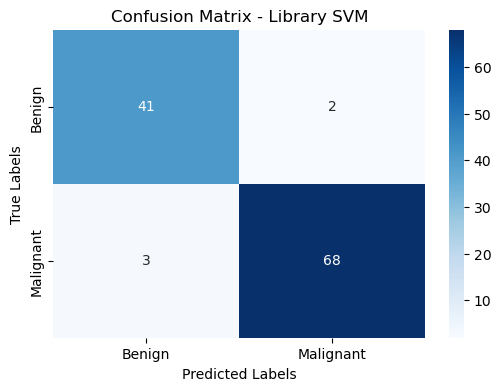

In [2634]:
# heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix - Library SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Dont know if i will prsesnt these due to time and size

### Different C values

In [2637]:
def custom_svm(X_train, y_train, C=1e4): 
    # +1, -1 for SVM
    y_train = y_train.replace(0, -1).values.astype(float)
    # QP solver
    m, n = X_train.shape
    K = np.dot(X_train, X_train.T)
    P = matrix(np.outer(y_train, y_train) * K)
    q = matrix(-np.ones(m))
    G = matrix(np.vstack((-np.eye(m), np.eye(m))))
    h = matrix(np.hstack((np.zeros(m), np.ones(m) * C)))  # C is now dynamic
    A = matrix(y_train, (1, m), 'd')
    b = matrix(0.0)
    solvers.options['show_progress'] = False
    solution = solvers.qp(P, q, G, h, A, b)
    alphas = np.ravel(solution['x'])
    support_vector_indices = alphas > 1e-5
    support_vectors = X_train[support_vector_indices]
    support_vector_labels = y_train[support_vector_indices]
    support_alphas = alphas[support_vector_indices]
    w = np.sum(support_alphas[:, None] * support_vector_labels[:, None] * support_vectors, axis=0)
    b = np.mean(support_vector_labels - np.dot(support_vectors, w))

    return w, b, support_vectors

In [2638]:
def evaluate_custom_svm(C):
    # Looking at C
    w, b, support_vectors = custom_svm(pd.DataFrame(X_train), pd.Series(y_train), C=C)
    def predict_custom_svm(X, w, b):
        decision = np.dot(X, w) + b
        return np.where(decision >= 0, 1, 0)
    
    y_pred_custom = predict_custom_svm(X_test, w, b)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred_custom)
    precision = precision_score(y_test, y_pred_custom)
    recall = recall_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    
    return {"C": C, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1, "Support Vectors": len(support_vectors)}

In [2639]:
# Looping through the C values
C_values = [100, 1000, 1e4, 1e5]
results = [evaluate_custom_svm(C) for C in C_values]

In [2640]:
custom_results_df = pd.DataFrame(results)

In [2641]:
custom_results_df

,C,Accuracy,Precision,Recall,F1-Score,Support Vectors
0,100.0,0.929825,0.984615,0.901408,0.941176,25
1,1000.0,0.938596,0.984848,0.915493,0.948905,25
2,10000.0,0.938596,0.984848,0.915493,0.948905,25
3,100000.0,0.938596,0.984848,0.915493,0.948905,25


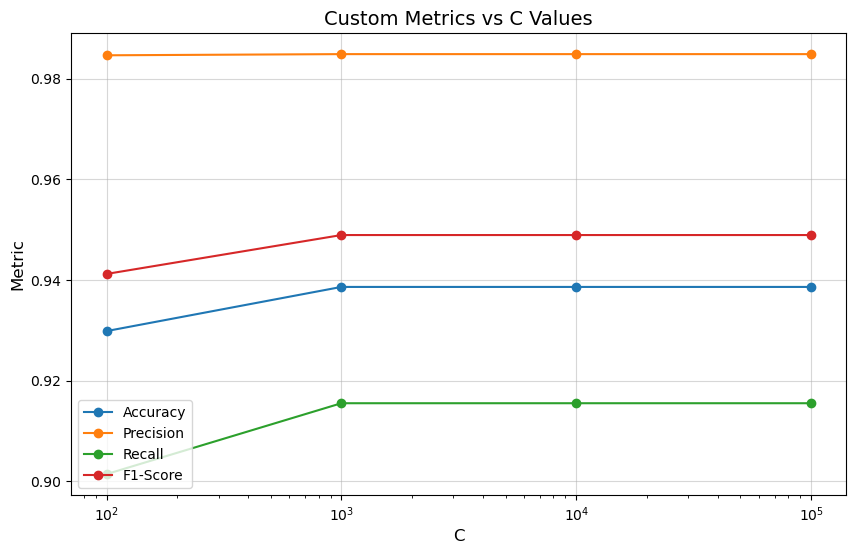

In [2642]:
# Plot
plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    plt.plot(results_df['C'], results_df[metric], label=metric, marker='o')
plt.xscale('log') 
plt.xlabel("C", fontsize=12)
plt.ylabel("Metric", fontsize=12)
plt.title("Custom Metrics vs C Values", fontsize=14)
plt.legend(loc="lower left")
plt.grid(alpha=0.5)
plt.show()

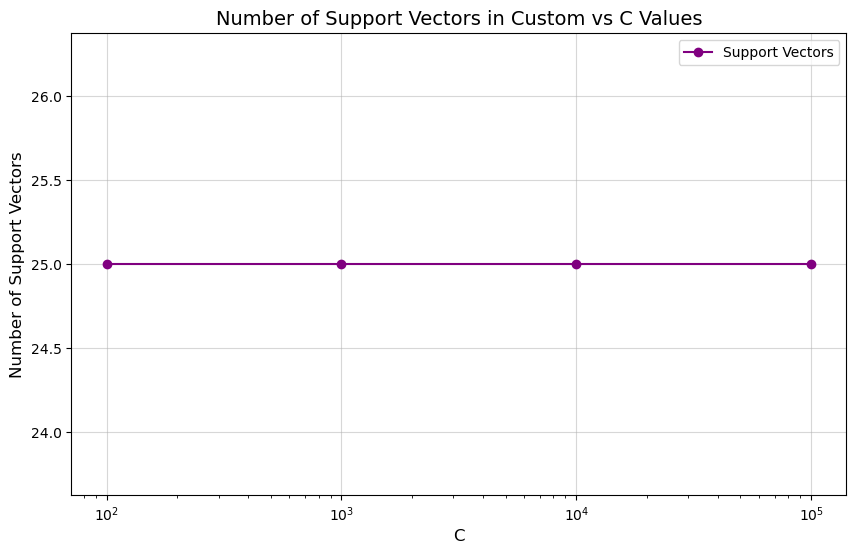

In [2643]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['C'], results_df['Support Vectors'], label="Support Vectors", marker='o', color='purple')
plt.xscale('log')
plt.xlabel("C", fontsize=12)
plt.ylabel("Number of Support Vectors", fontsize=12)
plt.title("Number of Support Vectors in Custom vs C Values", fontsize=14)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [2644]:
# library SVM for a range of C
def evaluate_library_svm(C):
    model = SVC(C=C, kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    support_vectors = len(model.support_)
    
    return {"C": C, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1, "Support Vectors": support_vectors}

In [2645]:
# Same C values as beforw
C_values = [100, 1000, 1e4, 1e5]
library_results = [evaluate_library_svm(C) for C in C_values]

In [2646]:
library_results_df = pd.DataFrame(library_results)

In [2647]:
library_results_df

,C,Accuracy,Precision,Recall,F1-Score,Support Vectors
0,100.0,0.929825,0.984615,0.901408,0.941176,25
1,1000.0,0.938596,0.984848,0.915493,0.948905,25
2,10000.0,0.938596,0.984848,0.915493,0.948905,25
3,100000.0,0.938596,0.984848,0.915493,0.948905,25


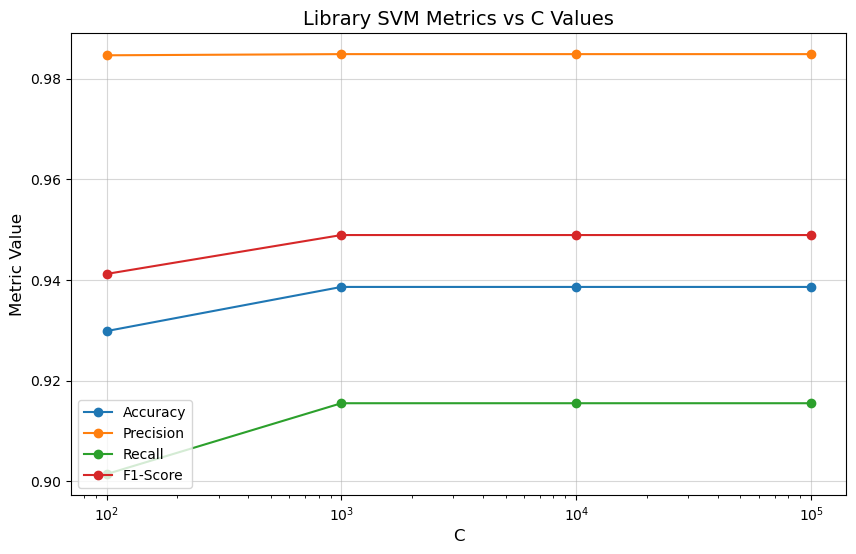

In [2648]:
plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    plt.plot(library_results_df['C'], library_results_df[metric], label=metric, marker='o')
plt.xscale('log')
plt.xlabel("C", fontsize=12)
plt.ylabel("Metric Value", fontsize=12)
plt.title("Library SVM Metrics vs C Values", fontsize=14)
plt.legend(loc="lower left")
plt.grid(alpha=0.5)
plt.show()

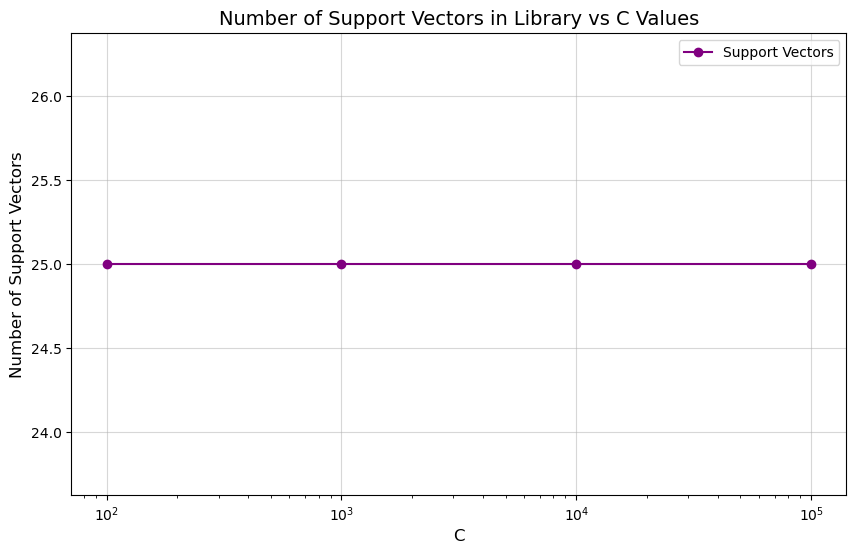

In [2649]:
plt.figure(figsize=(10, 6))
plt.plot(library_results_df['C'], library_results_df['Support Vectors'], label="Support Vectors", marker='o', color='purple')
plt.xscale('log') 
plt.xlabel("C", fontsize=12)
plt.ylabel("Number of Support Vectors", fontsize=12)
plt.title("Number of Support Vectors in Library vs C Values", fontsize=14)
plt.grid(alpha=0.5)
plt.legend()
plt.show()